<a href="https://colab.research.google.com/github/Amirahashem/face-attendance-system/blob/main/deepface_attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install DeepFace only (no need for face_recognition or dlib)
!pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e4408f873e30451c1165116cef304ad08463ab1ccea1b4662be6ad4e398c9325
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
from google.colab import files

print("Upload dataset.zip with person folders")
uploaded = files.upload()


Upload dataset.zip with person folders


Saving dataset.zip to dataset (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")



In [ ]:
print("Upload a face image (e.g., test.jpg)")
uploaded_img = files.upload()

img_name = list(uploaded_img.keys())[0]  # اسم الصورة


Upload a face image (e.g., test.jpg)


Saving img2.jpg to img2 (1).jpg


👤 Images for: abouzaid


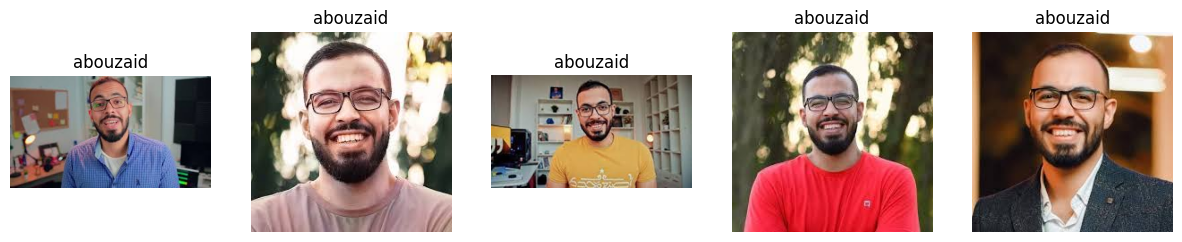

👤 Images for: elzero


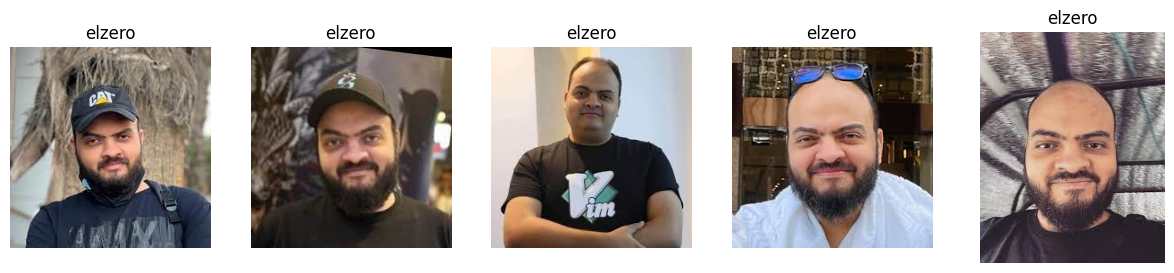

👤 Images for: aboutrika


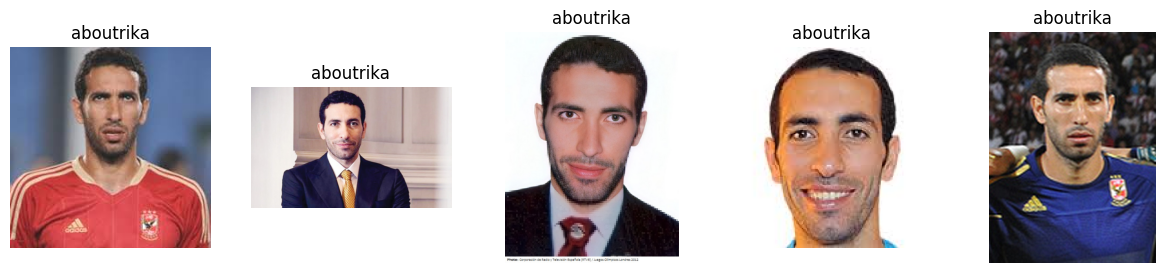

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Main directory path
main_folder = "dataset/dataset"

# Display images from each subfolder
for person_folder in os.listdir(main_folder):
    person_path = os.path.join(main_folder, person_folder)

    if os.path.isdir(person_path):
        print(f"Images for: {person_folder}")

        images = os.listdir(person_path)
        fig, axs = plt.subplots(1, len(images), figsize=(15, 3))  # Number of available images

        # Handle case of single image to avoid indexing errors
        if len(images) == 1:
            axs = [axs]

        for i, image_name in enumerate(images):
            image_path = os.path.join(person_path, image_name)
            img = mpimg.imread(image_path)
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(person_folder)  # Display person name instead of image name

        plt.show()


In [ ]:
from deepface import DeepFace
import os

# Disable GPU if not available
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

print("🔍 Performing face recognition using DeepFace...")

result_df = DeepFace.find(
    img_path=img_name,
    db_path="dataset/dataset",  # ← This is the correct path now
    model_name="Facenet",
    enforce_detection=False
)

print("✅ Results found:")
print(result_df)



🔍 Performing face recognition using DeepFace...
25-07-27 14:43:12 - Searching img2 (1).jpg in 15 length datastore
25-07-27 14:43:13 - find function duration 0.573115348815918 seconds
✅ Results found:
[                          identity                                      hash  \
0  dataset/dataset/elzero/img2.jpg  4e71398b15f82fbd6209289ef692f2674ee0ca3f   
1  dataset/dataset/elzero/img3.jpg  2bb0e6f8e59a2548a326f58bf03c78929b704ea5   
2  dataset/dataset/elzero/img1.jpg  46817e3c473e21a3672cbd60abacda2be8a243e8   
3  dataset/dataset/elzero/img4.jpg  2817ccfdb327dc17b1973f30023307252ff5f458   
4  dataset/dataset/elzero/img5.jpg  555fc9d7a26c68c73e3c236c02969d447bd7f1a2   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0        52        56       116       116        52        56       116   
1        37        70       127       127        52        56       116   
2        58        57        91        91        52        56       116   
3        74       

In [ ]:
import pandas as pd
from datetime import datetime
import os

# If DeepFace returned a list, take the first item (DataFrame)
if isinstance(result_df, list):
    result_df = result_df[0]

# Extract the closest match from DeepFace results
if not result_df.empty:
    matched_img_path = result_df.iloc[0]['identity']
    person_name = os.path.basename(os.path.dirname(matched_img_path))
    print(f"✅ Recognized: {person_name}")

    now = datetime.now()
    date_str = now.strftime("%Y-%m-%d")
    time_str = now.strftime("%H:%M:%S")

    attendance_file = "attendance.csv"

    # Load existing attendance file or create a new one
    if os.path.exists(attendance_file):
        df_attendance = pd.read_csv(attendance_file)
    else:
        df_attendance = pd.DataFrame(columns=["Name", "Date", "Time"])

    # Check if the person has already been marked present today
    if not ((df_attendance["Name"] == person_name) & (df_attendance["Date"] == date_str)).any():
        new_row = {"Name": person_name, "Date": date_str, "Time": time_str}
        df_attendance = pd.concat([df_attendance, pd.DataFrame([new_row])], ignore_index=True)
        df_attendance.to_csv(attendance_file, index=False)
        print("Attendance recorded in attendance.csv")
    else:
        print("This person has already been marked present today.")
else:
    print("No match found in the database.")


✅ Recognized: elzero
This person has already been marked present today.


In [ ]:
from google.colab import files
files.download("attendance.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>